In [140]:
import networkx as nx

# For visualization
import matplotlib as plt
from nxviz import CircosPlot

# For Bipartite graph computation
from networkx.algorithms import bipartite

import math

In [141]:
# Initialise the graph
B = nx.Graph()

# Add nodes with the node attribute "bipartite"
# three drivers within the grid
drivers = [1, 2, 3]
dr_loc = [[1, 2], [3, 4], [4, 5]]
passengers = ["A", "B", "C",]
pa_loc = [[10, 13], [4, 2], [3, 4]]



In [142]:
# Helper function to calculate the euclidean distance between two points. 
def weight(dr, pa):
    return math.sqrt((dr_loc[dr][0]- pa_loc[pa][0])**2 + (dr_loc[dr][1]- pa_loc[pa][1])**2 )





In [143]:
B.add_nodes_from(drivers, bipartite=0)
B.add_nodes_from(passengers, bipartite=1)

# Add edges with weights
B.add_edge(1, "A", weight = weight(0, 0))
B.add_edge(1, "B", weight = weight(0, 1))
B.add_edge(1, "C", weight = weight(0, 2))

B.add_edge(2, "A", weight = weight(1, 0))
B.add_edge(2, "B", weight = weight(1, 1))
B.add_edge(2, "C", weight = weight(1, 2))

B.add_edge(3, "A", weight = weight(2, 0))
B.add_edge(3, "B", weight = weight(2, 1))
B.add_edge(3, "C", weight = weight(2, 2))

#Obtain the minimum weight full matching
my_matching = bipartite.matching.minimum_weight_full_matching(B, drivers, "weight")

In [144]:
print(my_matching)


{1: 'B', 2: 'C', 3: 'A', 'B': 1, 'C': 2, 'A': 3}


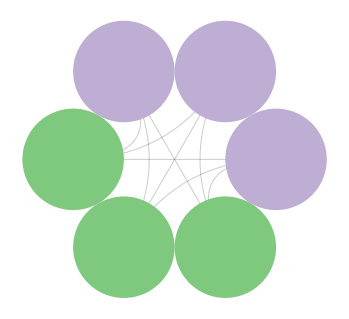

In [145]:
b = CircosPlot(B, node_grouping='bipartite', node_color='bipartite')
b.draw()


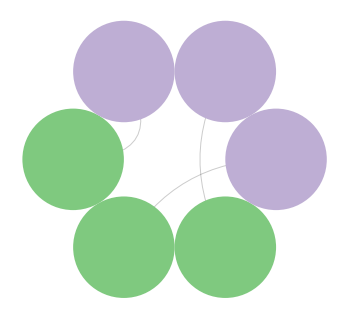

In [146]:
C = nx.Graph()
# Add nodes with the nod
C.add_nodes_from(drivers, bipartite=0)
C.add_nodes_from(passengers, bipartite=1)
C.add_edge(1, "C", weight = weight(0, 2))
C.add_edge(2, "A", weight = weight(1, 0))
C.add_edge(3, "B", weight = weight(2, 1))

c = CircosPlot(C, node_grouping='bipartite', node_color='bipartite')
c.draw()


# Further simulation with more passengers and drivers

In [147]:
from random import random


In [148]:
drivers = list(range(1, 21))
passengers = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M","N", "O", "P", "Q", "R", "S", "T"]
dr_loc=[]
pa_loc=[]
for i in drivers:
    dr_loc.append([10*random(), 10*random()])
for i in range(0, len(passengers)):
    pa_loc.append([10*random(), 10*random()])

    

In [149]:
len(dr_loc)

20

In [150]:
len(pa_loc)

20

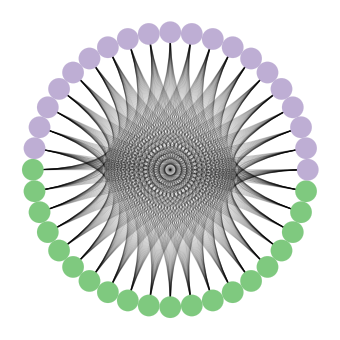

In [151]:
D = nx.Graph()
D.add_nodes_from(drivers, bipartite=0)
D.add_nodes_from(passengers, bipartite=1)
for i in drivers:
    for j in range(0, len(passengers)):
        D.add_edge(i, passengers[j], weight = weight(i-1, j))

d = CircosPlot(D, node_grouping='bipartite', node_color='bipartite')
d.draw()

In [152]:
#Matching solution for 20-passenger, 20-drivers.
my_matching = bipartite.matching.minimum_weight_full_matching(D, drivers, "weight")

my_matching

{1: 'M',
 2: 'L',
 3: 'K',
 4: 'N',
 5: 'B',
 6: 'A',
 7: 'T',
 8: 'P',
 9: 'E',
 10: 'Q',
 11: 'O',
 12: 'C',
 13: 'I',
 14: 'R',
 15: 'F',
 16: 'S',
 17: 'D',
 18: 'H',
 19: 'J',
 20: 'G',
 'M': 1,
 'L': 2,
 'K': 3,
 'N': 4,
 'B': 5,
 'A': 6,
 'T': 7,
 'P': 8,
 'E': 9,
 'Q': 10,
 'O': 11,
 'C': 12,
 'I': 13,
 'R': 14,
 'F': 15,
 'S': 16,
 'D': 17,
 'H': 18,
 'J': 19,
 'G': 20}

In [153]:
E = nx.Graph()
E.add_nodes_from(drivers, bipartite=0)
E.add_nodes_from(passengers, bipartite=1)

for key in my_matching:
    E.add_edge(key, my_matching[key])



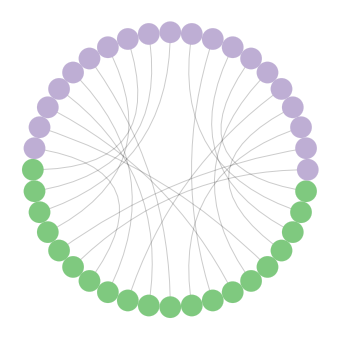

In [154]:
e = CircosPlot(E, node_grouping='bipartite', node_color='bipartite')
e.draw()